**Classifying newswires: a multiclass classification example**

#Load the dataset

In [27]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

In [28]:
train_data.shape, test_data.shape

((8982,), (2246,))

In [29]:
print(train_data[10])

[1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]


In [30]:
# Decode newswires back to text
word_index = reuters.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]
)
decode_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]]
)
print(decode_review)

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


Note: "0" - Padding. "1" - Start of sequence. "2" - Unknown.

#Prepare the data

**Encoding the integer sequence via multi-hot encoding**

In [31]:
# Prepare inputs by using multi-hot encoding

import numpy as np

# TODO: implement the following function for multi-hot encoding for inputs
def vectorize_sequences(sequences, dimension=10000):
  # TODO
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

x_train[0]

array([0., 1., 1., ..., 0., 0., 0.], shape=(10000,))

In [32]:
# Prepare outputs by using one-hot encoding

# TODO: implement one-hot encoding for outputs
def to_one_hot(labels, dimension=46):
  # TODO
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1.
  return results

y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

Note: it can also use the built-in function in Keras:
```
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)
```



#Build the model

**Define the model**

In [33]:
from tensorflow import keras
from keras import layers

# TODO: build DL NN model
model = keras.Sequential(
    [
        # TODO
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(46, activation="softmax")
    ]
)

**Compile the model**

In [34]:
# TODO: fill in the information for compiling the model
model.compile(
  # TODO
    optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

#Validate the model

**Fit the model with a validation set**

In [35]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [36]:
# TODO: train the model
history = model.fit(
    # TODO
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.5158 - loss: 2.6453 - val_accuracy: 0.6170 - val_loss: 1.7902
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6724 - loss: 1.5310 - val_accuracy: 0.6860 - val_loss: 1.3854
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7347 - loss: 1.1849 - val_accuracy: 0.7360 - val_loss: 1.2022
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7892 - loss: 0.9726 - val_accuracy: 0.7560 - val_loss: 1.0928
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8255 - loss: 0.8128 - val_accuracy: 0.7840 - val_loss: 1.0096
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8532 - loss: 0.6805 - val_accuracy: 0.7950 - val_loss: 0.9552
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8802 - loss: 0.5636 - val_accuracy: 0.7870 - val_loss: 0.9436
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8971 - loss: 0.4767 - val_accuracy: 0.8100 - val_l

**Plot the training and validation loss**

In [37]:
import matplotlib.pyplot as plt

def plot_training_validation_results(training_results, validation_results,
                                     title, ylabel):
  print("training: ", training_results)
  print("validation: ", validation_results)
  plt.clf()
  epochs = range(1, len(training_results)+1)
  plt.plot(epochs, training_results, "bo", label="Training")
  plt.plot(epochs, validation_results, "b", label="Validation")
  plt.xlabel("Epochs")
  plt.ylabel(ylabel)
  plt.legend()
  plt.show()

training:  [2.6452579498291016, 1.5310062170028687, 1.1849445104599, 0.9725810885429382, 0.8127797842025757, 0.6805019378662109, 0.5635789036750793, 0.4767463505268097, 0.40041008591651917, 0.341471791267395, 0.2903251051902771, 0.25484082102775574, 0.22507625818252563, 0.2035335898399353, 0.1837051659822464, 0.16957412660121918, 0.1539662480354309, 0.14624060690402985, 0.13894905149936676, 0.13325126469135284]
validation:  [1.7901828289031982, 1.3854451179504395, 1.202203392982483, 1.092839241027832, 1.0095866918563843, 0.9551888704299927, 0.9435508847236633, 0.8808462619781494, 0.8789046406745911, 0.8685251474380493, 0.8713846206665039, 0.8716967701911926, 0.8938122987747192, 0.9097262024879456, 0.892709493637085, 0.9291096925735474, 0.9252978563308716, 0.9490825533866882, 0.9493012428283691, 0.9849288463592529]


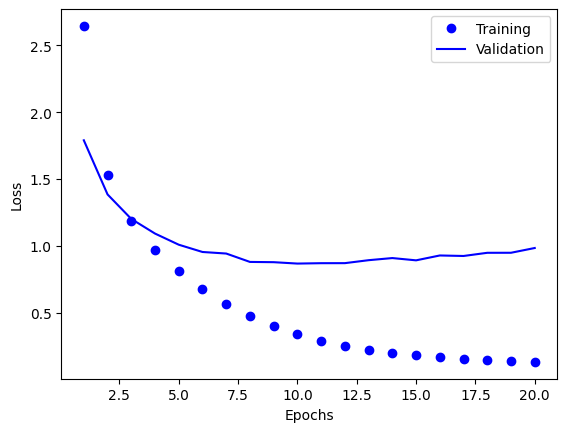

In [38]:
history_dict = history.history
training_loss_values = history_dict["loss"]
validation_loss_values = history_dict["val_loss"]
plot_training_validation_results(training_loss_values, validation_loss_values,
                                 "Training and validation loss", "Loss")

training:  [0.5157855153083801, 0.6723878979682922, 0.7346529960632324, 0.789150595664978, 0.8254823088645935, 0.8531696200370789, 0.8802305459976196, 0.8971436023712158, 0.9120520949363708, 0.92520672082901, 0.9351040124893188, 0.9427461624145508, 0.9466299414634705, 0.9481332898139954, 0.952267587184906, 0.9537709951400757, 0.9545226693153381, 0.9540215730667114, 0.9575294256210327, 0.9562765955924988]
validation:  [0.6169999837875366, 0.6859999895095825, 0.7360000014305115, 0.7559999823570251, 0.7839999794960022, 0.7950000166893005, 0.7870000004768372, 0.8100000023841858, 0.8090000152587891, 0.8220000267028809, 0.8130000233650208, 0.8159999847412109, 0.8090000152587891, 0.8100000023841858, 0.8199999928474426, 0.8059999942779541, 0.8019999861717224, 0.8100000023841858, 0.8090000152587891, 0.8019999861717224]


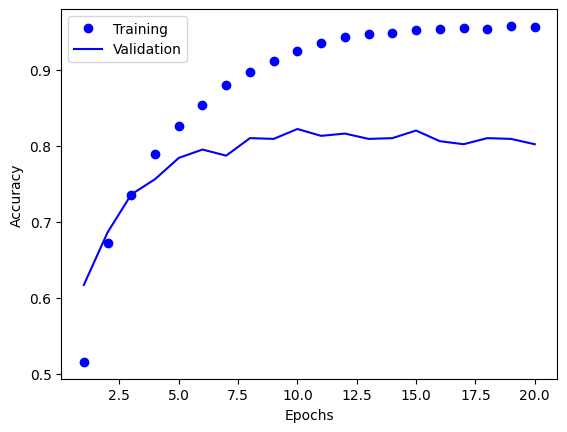

In [39]:
training_acc = history_dict["accuracy"]
validation_acc = history_dict["val_accuracy"]
plot_training_validation_results(training_acc, validation_acc,
                                 "Training and validation accuracy",
                                 "Accuracy")

**Refine the model**

In [40]:
# TODO: build DL NN model
model = keras.Sequential(
    [
        # TODO
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(46, activation="softmax")
    ]
)

In [41]:
# TODO: fill in the information for compiling the model
model.compile(
    # TODO
    optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

#Predict new data

In [42]:
# TODO: train the model using the best epoch
best_epoch = 11

model.fit(
    # TODO
    x_train, 
    y_train,
    epochs=best_epoch, 
    batch_size=512
)

Epoch 1/11
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5278 - loss: 2.5997
Epoch 2/11
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6893 - loss: 1.4594
Epoch 3/11
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7578 - loss: 1.1177
Epoch 4/11
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8078 - loss: 0.9064
Epoch 5/11
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8388 - loss: 0.7461
Epoch 6/11
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8694 - loss: 0.6149
Epoch 7/11
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8939 - loss: 0.5107
Epoch 8/11
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9115 - loss: 0.4336
Epoch 9/11
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9205 - loss: 0.3695
Epoch 10/11
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9316 - loss: 0.3177
Epoch 11/11
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9378 - loss: 0.2802


In [43]:
model.predict(x_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 687us/step


array([[7.3959513e-06, 2.0162469e-04, 2.2999937e-05, ..., 6.6883447e-05,
        3.5106805e-06, 2.8943263e-05],
       [2.4985779e-02, 2.3572478e-02, 3.5051280e-03, ..., 4.0824027e-05,
        9.2774040e-05, 3.4203273e-03],
       [6.8143738e-04, 9.4394398e-01, 3.4188083e-04, ..., 1.9761709e-04,
        3.2664835e-04, 6.3220283e-04],
       ...,
       [3.8135506e-05, 1.1079294e-03, 1.0121110e-04, ..., 8.1754428e-05,
        2.1996017e-05, 3.7478731e-05],
       [4.0394170e-03, 1.3242254e-01, 6.5437336e-03, ..., 6.4443995e-04,
        3.8685428e-04, 4.5121158e-04],
       [4.2718244e-04, 5.0790435e-01, 6.3285716e-03, ..., 5.6464388e-04,
        1.7163798e-03, 1.0085722e-04]], shape=(2246, 46), dtype=float32)

In [44]:
results = model.evaluate(x_test, y_test)
print(results)

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 644us/step - accuracy: 0.7988 - loss: 0.9223
[0.922330915927887, 0.7987533211708069]


#Other experiments

##Consider the baseline

In [45]:
import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

np.float64(0.19456812110418523)

In [46]:
results = np.zeros(46)
for label in test_labels:
  results[label] += 1
print(results)
print(max(results))
print(max(results) / sum(results))

[ 12. 105.  20. 813. 474.   5.  14.   3.  38.  25.  30.  83.  13.  37.
   2.   9.  99.  12.  20. 133.  70.  27.   7.  12.  19.  31.   8.   4.
  10.   4.  12.  13.  10.   5.   7.   6.  11.   2.   3.   5.  10.   8.
   3.   6.   5.   1.]
813.0
0.3619768477292965


In [47]:
results = np.zeros(46)
for label in train_labels:
  results[label] += 1
print(results)
print(max(results))
print(max(results) / sum(results))

[  55.  432.   74. 3159. 1949.   17.   48.   16.  139.  101.  124.  390.
   49.  172.   26.   20.  444.   39.   66.  549.  269.  100.   15.   41.
   62.   92.   24.   15.   48.   19.   45.   39.   32.   11.   50.   10.
   49.   19.   19.   24.   36.   30.   13.   21.   12.   18.]
3159.0
0.3517034068136273
